# Neural Network Training on noisy MNIST images
This notebook trains a neural network of 1 dense layer of 128 neurons on increasingly noisy images of numbers from the MNIST database. It shows the effects of training a network on images with and without noise when testing the accuracy of the network's predictions.

First we will need to import the necessary modules and define the noise function that will make our images more 'unclear'.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

def add_noise_to_mnist(images, ynoise):
    ''' Adds noise of a normal distrubtion within given range `ynoise` to an image input'''
    noise = np.random.uniform(0, ynoise, images.shape) # generate noisy points from random dist
    noisy_images = images + noise # add noise to images
    return np.clip(noisy_images, 0, 255) # output data limited to 255

## Construction and Training
Now we will import the MNIST training and testing sets that consist of images and labels, before normalising them. The training set of images `x_train` will be used to 'train' our neural network `model` to be able to detect the number displayed within each image and test its own accuracy against the associated labels `y_train`. Then the network will be assessed using the testing set (`x_test` and `y_test`) also imported from MNIST.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # load MNIST training and test images with labels

# normalise data
x_train = x_train / 255.0
x_test = x_test / 255.0

# create neural network with 128 neurons in hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 28x28 2D pixel array into 1D array of 784 elements
    keras.layers.Dense(128, activation='relu'), # hidden layer of 128 neurons of relu activation
    keras.layers.Dense(10, activation='softmax') # output layer
])

# compile network
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=0.3), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=100, epochs=5) # train model on training set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2) # test model on testing set
print('Test accuracy: ' + str(test_acc))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


600/600 [==============================] - 6s 9ms/step - loss: 0.3038 - accuracy: 0.9103
Epoch 2/5
600/600 [==============================] - 6s 9ms/step - loss: 0.1393 - accuracy: 0.9598
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.1008 - accuracy: 0.9708
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0786 - accuracy: 0.9771
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0652 - accuracy: 0.9808
313/313 - 1s - loss: 0.0787 - accuracy: 0.9749 - 595ms/epoch - 2ms/step
Test accuracy: 0.9749000072479248


An accuracy of >95% has been achieved on the testing set. Now it remains to see how our network will do with noisy test images.

## Noisy Testing
We can now define a function `TestNoisy` that adds noise to our MNIST image set (using our previously defined function), tests the network against them and returns the accuracy with increasing noise. It will also generate a plot so that we can visualise the trend of accuracy with increasing noise.

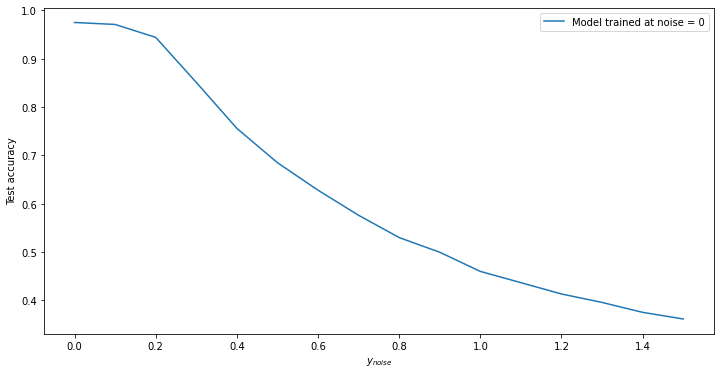

[0.9749000072479248,
 0.97079998254776,
 0.944100022315979,
 0.8510000109672546,
 0.7559000253677368,
 0.6848999857902527,
 0.628000020980835,
 0.5760999917984009,
 0.5299999713897705,
 0.49959999322891235,
 0.46000000834465027,
 0.4366999864578247,
 0.4133000075817108,
 0.39579999446868896,
 0.37529999017715454,
 0.36160001158714294]

In [ ]:
def TestNoisy(model,x_test,y_test,ynoise,train_noise):
  '''Tests the accuracy an input neural network on noisy MNIST images and produces a plot against input parameter ynoise'''
  test_accuracies = [] # initialise accuracy array
  for noise in ynoise:
      x_test_noisy = add_noise_to_mnist(x_test, noise) # make test images noisy
      test_loss, test_acc = model.evaluate(x_test_noisy, y_test, verbose = 0) # accuracy of model on noisy images
      test_accuracies.append(test_acc) # update accuracies

  # plot accuracy against noise level
  fig = plt.figure(figsize=(12, 6))
  plt.plot(ynoise, test_accuracies, label = 'Model trained at noise = ' + str(train_noise))
  plt.xlabel("$y_{noise}$")
  plt.ylabel("Test accuracy")
  plt.legend()
  plt.show()

  return test_accuracies

ynoise = np.linspace(0,1.5,16) # increasing noise levels to 1
TestNoisy(model,x_test,y_test,ynoise,0) # test network against increasing noisy images



As we can see from the graph, our neural network becomes less accurate at prediciting the number shown in each image when the images becomes more noisy (expected), especially at noises above 0.2. Now, we can see if we can improve this by training our network on a training set with noise before testing on the noisy set. We will redefine the network every time such that it does not fit to previous data in each iteration.

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


600/600 [==============================] - 3s 4ms/step - loss: 0.3092 - accuracy: 0.9101
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1440 - accuracy: 0.9580
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1044 - accuracy: 0.9692
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0826 - accuracy: 0.9753
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0684 - accuracy: 0.9800


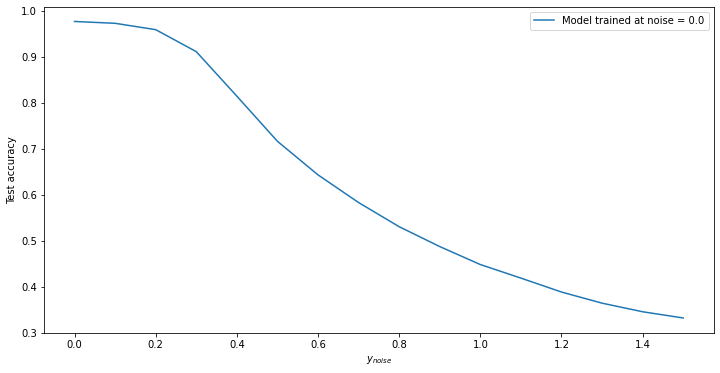

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


600/600 [==============================] - 3s 4ms/step - loss: 0.3236 - accuracy: 0.9032
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1489 - accuracy: 0.9569
Epoch 3/5
600/600 [==============================] - 3s 5ms/step - loss: 0.1084 - accuracy: 0.9675
Epoch 4/5
600/600 [==============================] - 5s 8ms/step - loss: 0.0861 - accuracy: 0.9744
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0707 - accuracy: 0.9795


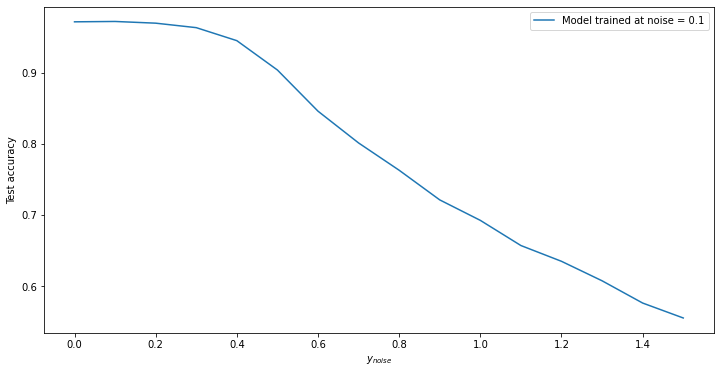

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


600/600 [==============================] - 3s 4ms/step - loss: 0.3441 - accuracy: 0.8967
Epoch 2/5
600/600 [==============================] - 3s 4ms/step - loss: 0.1533 - accuracy: 0.9550
Epoch 3/5
600/600 [==============================] - 3s 4ms/step - loss: 0.1105 - accuracy: 0.9681
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0882 - accuracy: 0.9743
Epoch 5/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0721 - accuracy: 0.9787


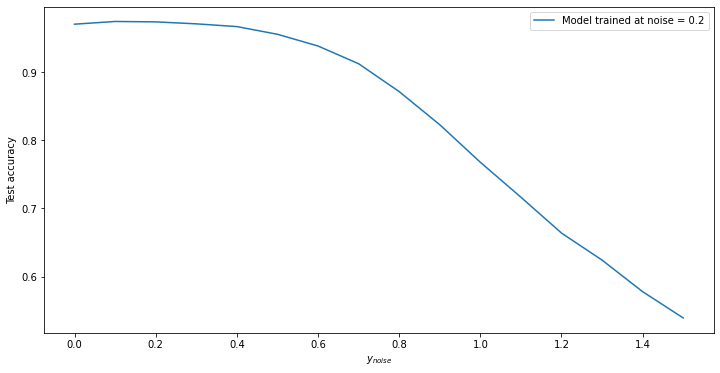

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


600/600 [==============================] - 3s 4ms/step - loss: 0.3765 - accuracy: 0.8843
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1631 - accuracy: 0.9517
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1224 - accuracy: 0.9634
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0971 - accuracy: 0.9708
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0806 - accuracy: 0.9764


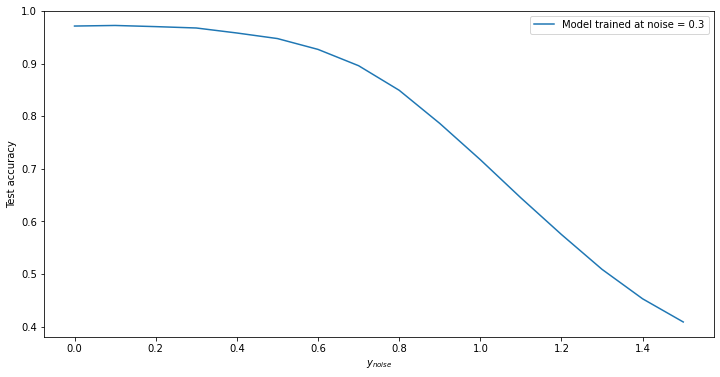

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


600/600 [==============================] - 3s 4ms/step - loss: 0.4347 - accuracy: 0.8640
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1819 - accuracy: 0.9458
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1328 - accuracy: 0.9612
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1069 - accuracy: 0.9683
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0870 - accuracy: 0.9744


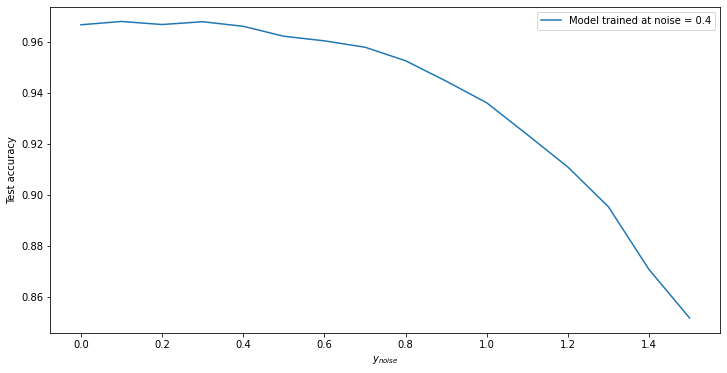

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


600/600 [==============================] - 3s 4ms/step - loss: 0.5680 - accuracy: 0.8182
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.2240 - accuracy: 0.9324
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1700 - accuracy: 0.9492
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1394 - accuracy: 0.9576
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1199 - accuracy: 0.9633


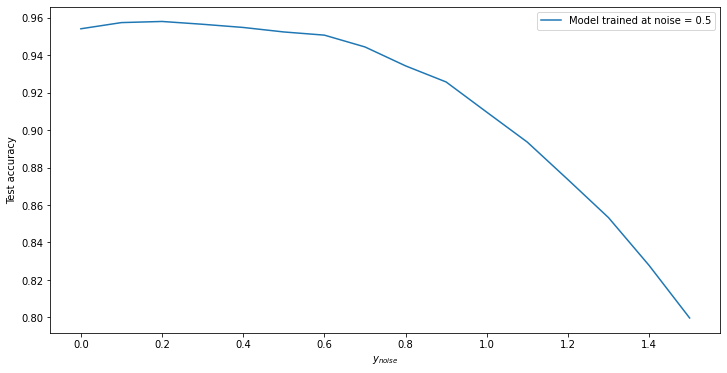

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


600/600 [==============================] - 3s 4ms/step - loss: 0.7599 - accuracy: 0.7477
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.3110 - accuracy: 0.9042
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.2543 - accuracy: 0.9220
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.2111 - accuracy: 0.9365
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1847 - accuracy: 0.9439


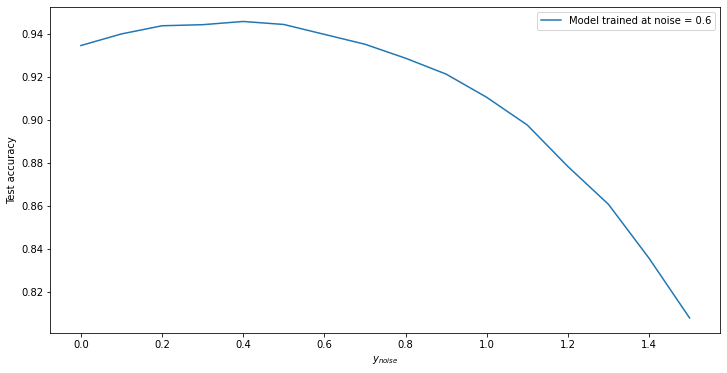

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


600/600 [==============================] - 3s 4ms/step - loss: 1.8659 - accuracy: 0.3175
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 1.5236 - accuracy: 0.4648
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 1.6489 - accuracy: 0.4047
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 1.9209 - accuracy: 0.3002
Epoch 5/5
600/600 [==============================] - 3s 4ms/step - loss: 1.9725 - accuracy: 0.2526


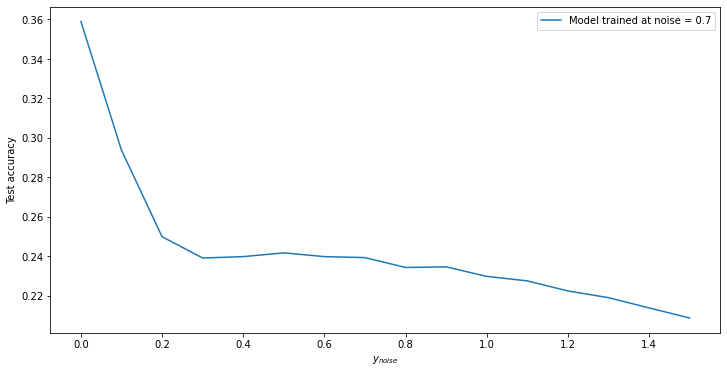

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


600/600 [==============================] - 3s 4ms/step - loss: 2.0904 - accuracy: 0.1998
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 2.1156 - accuracy: 0.1844
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 2.2970 - accuracy: 0.1144
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 2.2994 - accuracy: 0.1141
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 2.0999 - accuracy: 0.1972


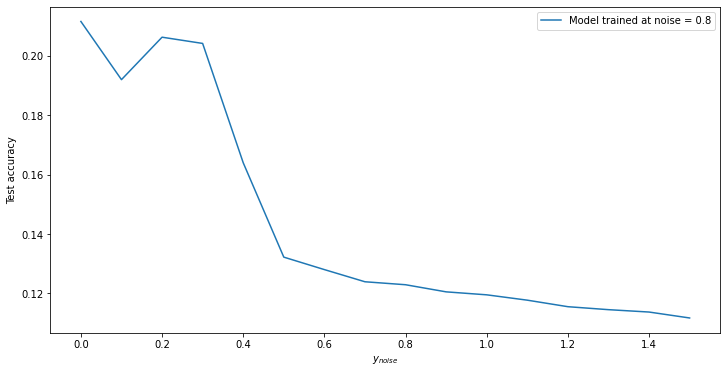

In [ ]:
training_noises = np.linspace(0,0.8,9) # training noise range
accuracies = [] # initialise array
for i in training_noises:
  # create fresh model
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 28x28 2D pixel array into 1D array of 784 elements
    keras.layers.Dense(128, activation='relu'), # hidden layer of 128 neurons of relu activation
    keras.layers.Dense(10, activation='softmax')]) # output layer
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=0.3), metrics=['accuracy'])

  # test on noisy
  x_train_noisy = add_noise_to_mnist(x_train, i) # add noise to training images
  model.fit(x_train_noisy, y_train, batch_size=100, epochs=5) # train network on noisy images
  test_accuracy = TestNoisy(model,x_test,y_test,ynoise,round(i,1)) # test network on noisy images and produce graph
  accuracies.append(test_accuracy) # update accuracies

Let's produce a plot of all these lines on one graph so that we might be able to determine which noise level allows our network to perform the best on noisy images within our specified range.

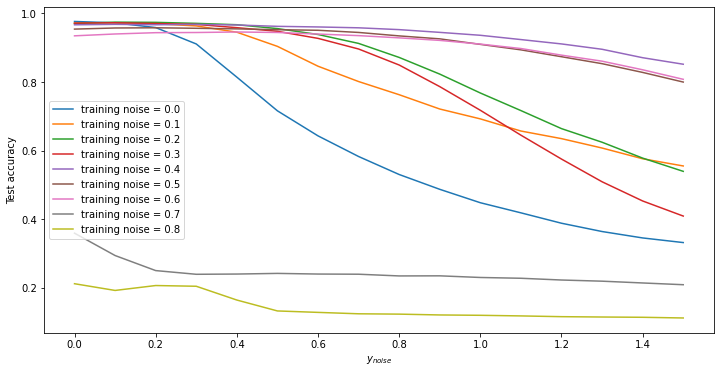

In [ ]:
fig = plt.figure(figsize=(12, 6))
# plot each curve
for j in range(len(training_noises)):
  plt.plot(ynoise, accuracies[j], label = "training noise = " + str(round(training_noises[j],1)))
  plt.legend()
plt.xlabel("$y_{noise}$")
plt.ylabel("Test accuracy")
plt.show()

## Conclusion
As we can see from the graph above, a training noise between 0.4 and 0.6 leads to the best 'performance' of the network, where we are defining the performance as the highest continual testing accuracy over the `ynoise` range. Training noises >0.6/0.7 consistently result in very low testing accuracies across the whole range. This is most likely attributed to the fact that the images become too unintelligible with higher noise levels for the network to successfully train on to a high accuracy at the chosen learning rate, as evidenced by the sudden drop in training accuracies for noises above this range. Otherwise, increased noise levels during training has shown to produce higher accuracies on tests each time the noise was increased up until around 0.6. Increasing the number of epochs would lead to overfitting on the training data and may result in lower accuracies when training. On top of this, higher noises may be overfitting to 'noisy' images such that they return low accuracies when determining cleaner images.